In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from imageio.v2 import imread 

# set default figure size
plt.rcParams['figure.figsize'] = [6, 4]
# set tick label size 
plt.rcParams.update({'font.size': 10})
# set x any y label size and title size
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'axes.titlesize': 15})
# add grid by default
plt.rcParams['axes.grid'] = False
# set legend size to 10
plt.rcParams.update({'legend.fontsize': 12})
# set tick label font sie
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

(1285, 1920)
Shape of A: (1285, 1285)


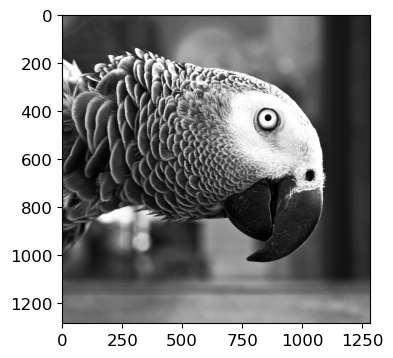

In [90]:
# Read the parrot image and crop it to a square
A = imread('parrot.jpg').astype(float)[...,0]
print(A.shape)
ypix = A.shape[0]
xpix = A.shape[1]
A = A[:,xpix-ypix:] / 255
print(f'Shape of A: {A.shape}')
plt.imshow(A,cmap='gray')


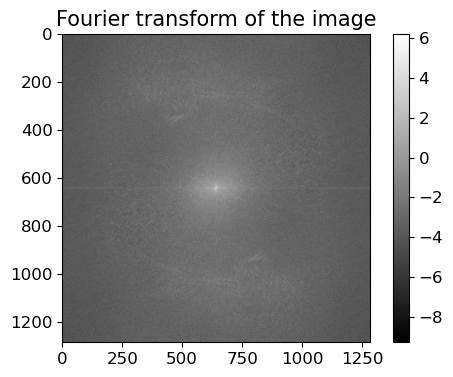

In [91]:

# Compute the frequencies in the image (k)
k = np.fft.fftshift(np.fft.fftfreq(ypix))

# Compute the Fourier transform of the image
B = np.fft.fftshift(np.fft.fftn(A, norm='ortho'))

plt.figure()
plt.imshow(np.log(np.abs(B)), cmap='gray' )
plt.title('Fourier transform of the image')
plt.colorbar()
plt.show()


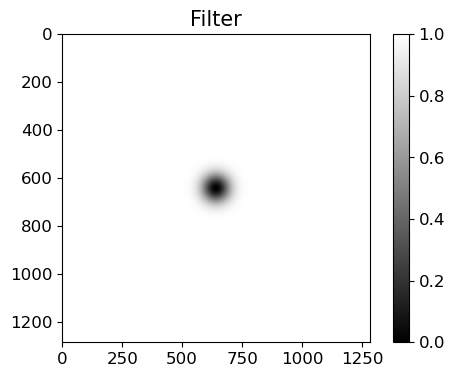

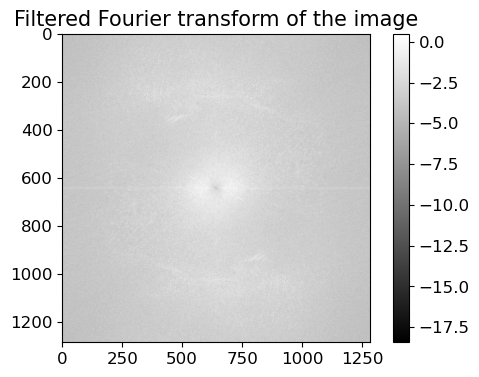

In [100]:
# make a gaussian filter

kx, ky = np.meshgrid(k, k)

k0x = 0.0
k0y = 0.0
k_squared = (kx-k0x)**2 + (ky-k0y)**2

# high-pass filter
filter = 1- np.exp(-k_squared/0.002)
# low-pass filter
#filter = np.exp(-k_squared/0.002)

# Filter image
B2 = B * filter


plt.figure()
plt.imshow(filter, cmap='gray' )
plt.title('Filter')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.log(np.abs(B2+1e-8)), cmap='gray' )
plt.colorbar()
plt.title('Filtered Fourier transform of the image')
plt.show()




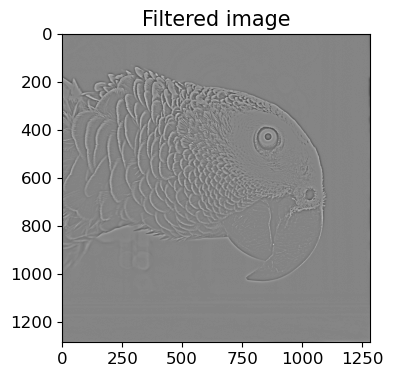

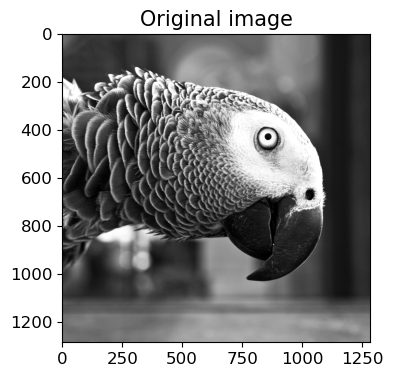

In [99]:
A2 = np.fft.ifftn(np.fft.ifftshift(B2), norm='ortho').real

plt.figure()
plt.imshow(A2,cmap='gray')
plt.title('Filtered image')
plt.show()
plt.figure()
plt.imshow(A,cmap='gray')
plt.title('Original image')
plt.show()

